## Project 1

## K Means Clutering Model 

#####  Problem Statement: Observing the change in positioning of economies based on their per capita spending and growth rates in three growth phases(timeline)


Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '1990 [YR1990]', '2000 [YR2000]', '2015 [YR2015]', '2016 [YR2016]',
       '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]',
       '2021 [YR2021]', '2022 [YR2022]'],
      dtype='object')
                                   Country Name  2000 [YR2000]  2015 [YR2015]  \
0                                   Afghanistan      58.466866      59.919605   
1                                       Albania      65.476746     253.933472   
2                                       Algeria      61.857853     296.768250   
3                                American Samoa            NaN            NaN   
4                                       Andorra    1295.085083    2672.264648   
..                                          ...            ...            ...   
261                          Sub-Saharan Africa      32.396955      82.500771   
262  Sub-Saharan Africa (excluding high income)      35.468106      8

C:\Users\DELL\AppData\Local\Temp\ipykernel_9496\2424130350.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Meta['2000 [YR2000]'] = pd.to_numeric(Meta['2000 [YR2000]'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9496\2424130350.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Meta['2015 [YR2015]'] = pd.to_numeric(Meta['2015 [YR2015]'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9496\2424130350.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

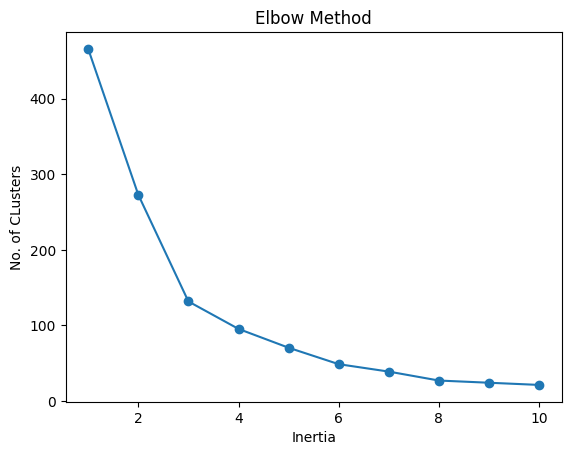

C:\Users\DELL\AppData\Local\Temp\ipykernel_9496\2424130350.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Meta['Cluster'] = Model.labels_


                                   Country Name  2000 [YR2000]  2015 [YR2015]  \
0                                   Afghanistan      58.466866      59.919605   
1                                       Albania      65.476746     253.933472   
2                                       Algeria      61.857853     296.768250   
4                                       Andorra    1295.085083    2672.264648   
5                                        Angola      13.159986     107.528572   
..                                          ...            ...            ...   
261                          Sub-Saharan Africa      32.396955      82.500771   
262  Sub-Saharan Africa (excluding high income)      35.468106      89.215296   
263   Sub-Saharan Africa (IDA & IBRD countries)      32.396955      82.500771   
264                         Upper middle income      97.971112     409.208860   
265                                       World     475.744810     973.153997   

     Growth_Rate  Cluster  

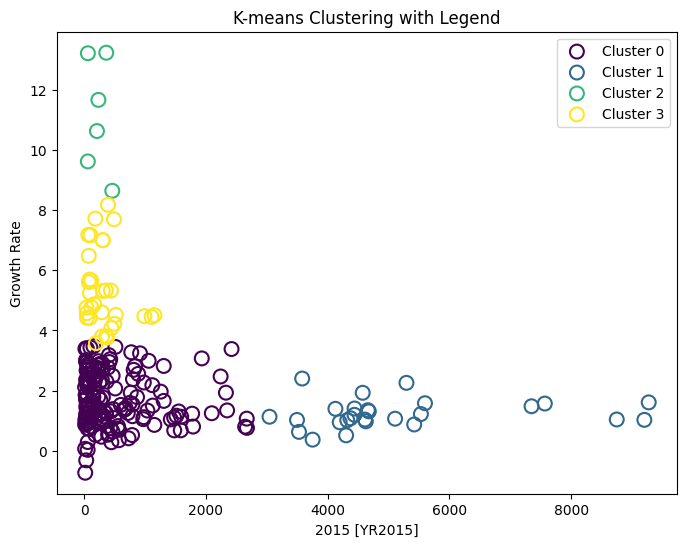

In [ ]:
# Preparing the Data Model
import pandas as pd

Data = pd.read_excel(r"C:\Users\DELL\Downloads\P_Data_Extract_From_World_Development_Indicators.xlsx")
print(Data.columns)

Df = Data[['Country Name','2000 [YR2000]','2015 [YR2015]']]
Df.isnull().sum()
Meta = Df.dropna()
Meta.isnull().sum()


Meta['2000 [YR2000]'] = pd.to_numeric(Meta['2000 [YR2000]'], errors='coerce')
Meta['2015 [YR2015]'] = pd.to_numeric(Meta['2015 [YR2015]'], errors='coerce')

def Growth_Rate(row):
    return (row['2015 [YR2015]'] / row['2000 [YR2000]']) - 1

Meta['Growth_Rate'] = Meta.apply(Growth_Rate, axis=1)
print(Meta)

Meta.isna().sum()
Meta.dropna(inplace=True)
Meta                        #Final Dataset


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Y_Mean = Meta['Growth_Rate'].mean()
X_Mean = Meta['2015 [YR2015]'].mean()


#var : X = Meta['2015 [YR2015]']
#var Y = Meta['Growth_Rate']

#Normalising the data

Scale = StandardScaler()
Alpha = Scale.fit_transform(Meta[['2015 [YR2015]','Growth_Rate']])

#Applying the Elbow Method

inertia = []
K_range = range(1, 11)  # k = 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Alpha)
    inertia.append(kmeans.inertia_)

plt.plot(K_range,inertia,marker = 'o')
plt.xlabel('Inertia')
plt.ylabel('No. of CLusters')
plt.title('Elbow Method')
plt.show()

# Model Fitting

Model = KMeans(n_clusters=4,random_state=42)
Model.fit(Alpha)

Meta['Cluster'] = Model.labels_

print(Meta)

import matplotlib.pyplot as plt
import numpy as np

# Define colormap
colors = plt.cm.viridis(np.linspace(0, 1, Meta['Cluster'].nunique()))

plt.figure(figsize=(8,6))

for cluster, color in zip(sorted(Meta['Cluster'].unique()), colors):
    cluster_data = Meta[Meta['Cluster'] == cluster]
    plt.scatter(
        cluster_data['2015 [YR2015]'],
        cluster_data['Growth_Rate'],
        facecolors='none', edgecolors=color,
        s=100, linewidths=1.5,
        label=f"Cluster {cluster}"
    )

plt.xlabel("2015 [YR2015]")
plt.ylabel("Growth Rate")
plt.title("K-means Clustering with Legend")
plt.legend()
plt.show()


Meta

A = Meta['Cluster'].value_counts()







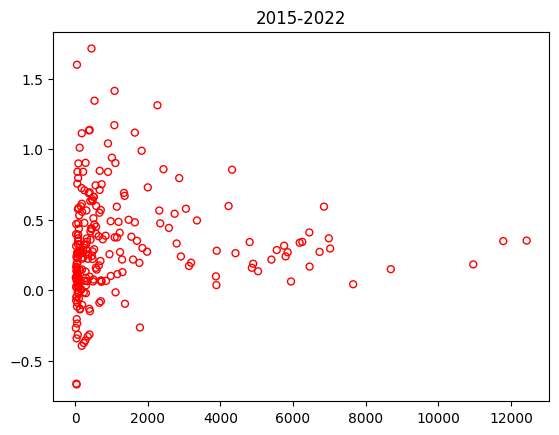

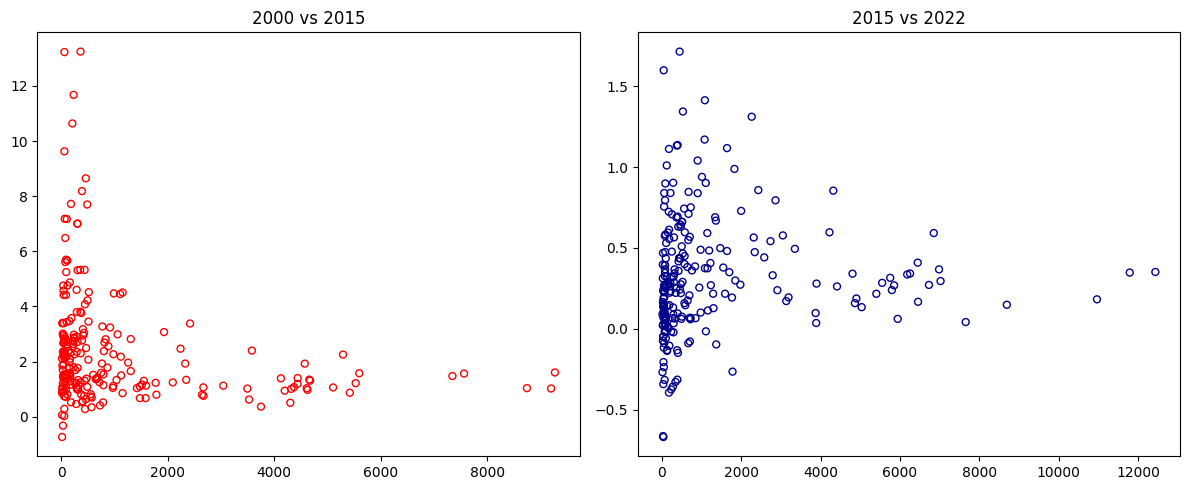

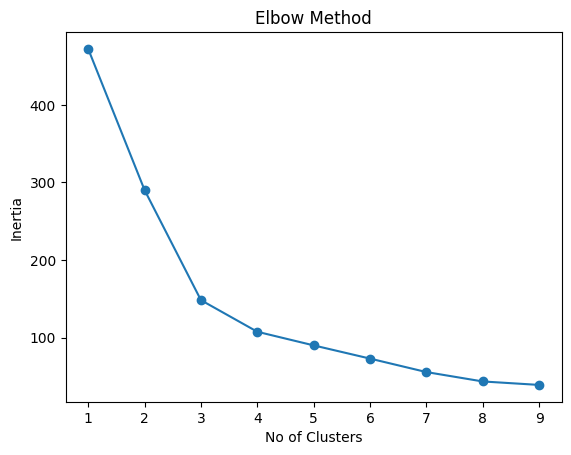

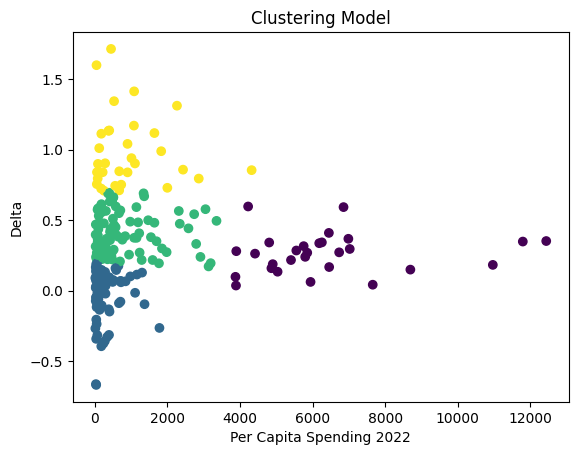

In [3]:
# Second Model 

Data

Gamma = Data[['Country Name','2015 [YR2015]','2022 [YR2022]']]
Gamma

#Data Cleaning
Gamma.isnull().sum()
Gamma = Gamma.dropna()
Gamma                       #Final Datasets

# 
Gamma['2022 [YR2022]'] = pd.to_numeric(Gamma['2022 [YR2022]'],errors='coerce')
Gamma['2015 [YR2015]'] = pd.to_numeric(Gamma['2015 [YR2015]'],errors='coerce')

def Delta(row):
    return(row['2022 [YR2022]'] / row['2015 [YR2015]']) - 1

Gamma['Delta'] = Gamma.apply(Delta,axis=1)
Gamma

#Plotting the scatter for raw observations

plt.scatter(Gamma['2022 [YR2022]'],
            Gamma['Delta'],
            facecolors = 'None',
            edgecolors='red',
              s=25)
plt.title('2015-2022')
plt.show()


fig, axs = plt.subplots(1,2,figsize = (12,5))

axs[0].scatter(Meta['2015 [YR2015]'],
               Meta['Growth_Rate'],
               facecolors = 'None',
               edgecolors='red', s=25)
axs[0].set_title('2000 vs 2015')


axs[1].scatter(Gamma['2022 [YR2022]'],
               Gamma['Delta'],
               facecolors = 'None',
               edgecolors = 'darkblue',
               s = 25)
axs[1].set_title('2015 vs 2022')
plt.tight_layout()
plt.show()

Gamma = Gamma.dropna()
#Normalising The data sets for analysis

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()                                #adding the function
                    
Fit = Scaler.fit_transform(Gamma[['2022 [YR2022]','Delta']])                     #adding the data to normalise


#Implementation of Elbow Method
inertia = []
k_range = range(1,10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # store into variable
    kmeans.fit(Fit)
    inertia.append(kmeans.inertia_)

# PLotting the elbow method

plt.plot(k_range,inertia,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

#Organising the clustering Model

Model = KMeans(n_clusters=4,random_state=42)
Model.fit(Fit)
Gamma['Cluster'] = Model.labels_

#Plotting the Cluster


plt.scatter(Gamma['2022 [YR2022]'],Gamma['Delta'],
            c=Gamma['Cluster'],cmap='viridis')
plt.xlabel('Per Capita Spending 2022')
plt.ylabel('Delta')
plt.title('Clustering Model')
plt.show()





## Project 2

### Player Segmentation 

#### Covariance, Correlation, K Means using Principal Component Analysis for 5 Dimension data model

Covariance Matrix:
 [[62.5 62.5 30. ]
 [62.5 62.5 30. ]
 [30.  30.  14.5]]

Covariance Matrix (Pandas):
         Height  Weight   Age
Height    62.5    62.5  30.0
Weight    62.5    62.5  30.0
Age       30.0    30.0  14.5


array([[ 1.93203176, -0.22505245, -0.15054009,  3.41940859,  1.96927268],
       [ 1.31060979,  0.70269722, -0.07609871,  3.33500719,  1.42743267],
       [ 0.62014095, -0.45698986,  0.66831515,  3.24457712,  1.55609095],
       ...,
       [-1.65840626, -0.45698986, -1.7138092 , -1.05185585, -1.32844227],
       [-1.58935937, -1.38473953, -1.78825059, -1.05185585, -1.33327905],
       [-1.52031249,  0.4707598 , -1.63936782, -1.05185585, -1.3049839 ]],
      shape=(539, 5))

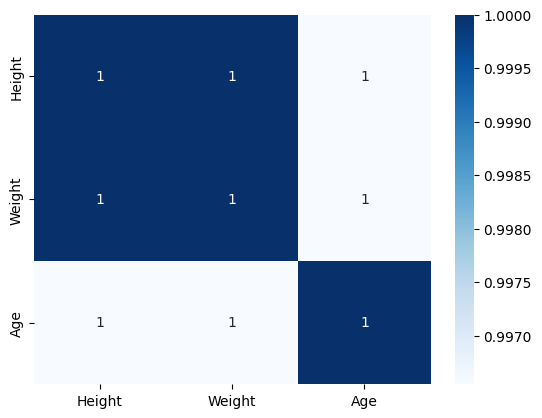

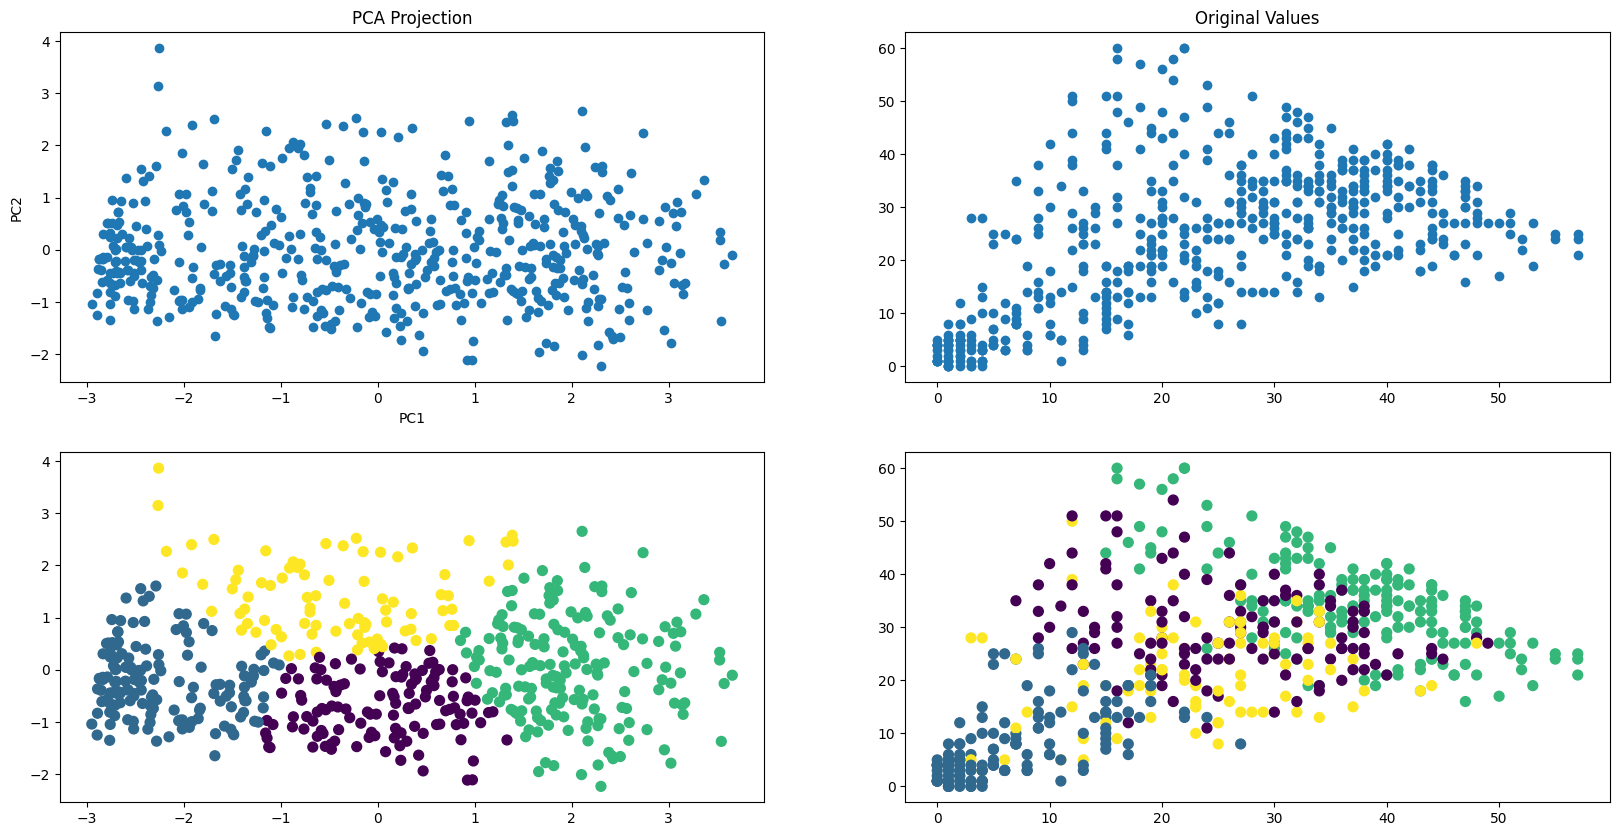

In [1]:
import numpy as np
import pandas as pd

# Fake dataset
data = {
    "Height": [160, 165, 170, 175, 180],
    "Weight": [55, 60, 65, 70, 75],
    "Age":    [25, 28, 30, 32, 35]
        }

df = pd.DataFrame(data)

# Covariance matrix
cov_matrix = np.cov(df.T)  # or df.cov().values
print("Covariance Matrix:\n", cov_matrix)

# Using pandas for labeled output
print("\nCovariance Matrix (Pandas):\n", df.cov())

Cor = df.corr()
Cor
import seaborn as sns
sns.heatmap(data=Cor,annot= True, cmap='Blues')
A = pd.read_csv(r"D:\Datasets\2023_nba_player_stats.csv")
A.describe()

#Datasets
Data = A


# Normalising the data 

from sklearn.preprocessing import StandardScaler

Scale = StandardScaler()



Scale = Scale.fit_transform(Data[['W','Age','L','PTS','Min']])

Scale                       # Final_Dataset

# Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_PCA = pca.fit_transform(Scale)
x_PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.scatter(x_PCA[:,0], x_PCA[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")

plt.subplot(2,2,2)
plt.scatter(Data['W'],Data['L'])
plt.title('Original Values')


from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, random_state= 42)
model = model.fit(x_PCA)
Data['Cluster'] = model.labels_
Data

# Plotting the clustering Model

plt.subplot(2,2,3)
plt.scatter(x_PCA[:,0],x_PCA[:,1],c=Data['Cluster'],s=50)

plt.subplot(2,2,4)
plt.scatter(Data['W'],Data['L'],c=Data['Cluster'],s=50)
pca.explained_variance_ratio_


Data['Cluster'].value_counts()

x_PCA
Data

Scale

## Project 3

## Customer Segmentation based on two variables and putting them into customer buying pattern quandrants

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        10000 non-null  int64 
 1   Age               10000 non-null  int64 
 2   Gender            10000 non-null  object
 3   Annual_Income_k$  10000 non-null  int64 
 4   Spending_Score    10000 non-null  int64 
 5   Family_Size       10000 non-null  int64 
 6   Tenure_Years      10000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 547.0+ KB


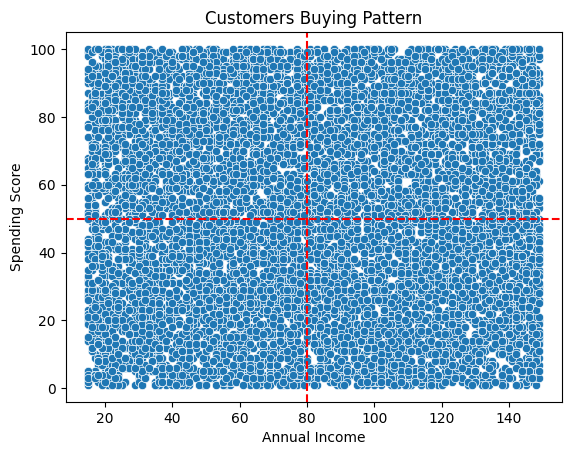

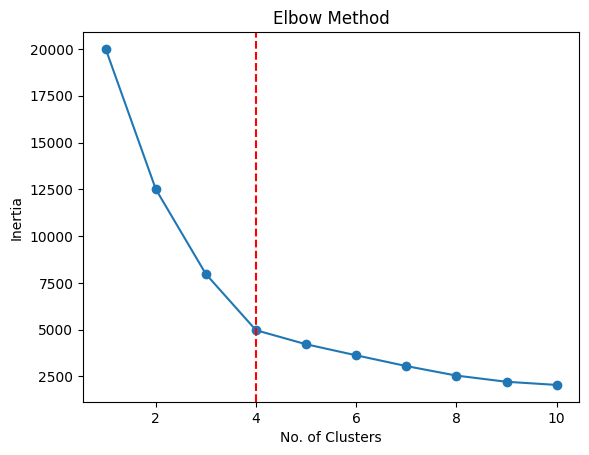

C:\Users\DELL\AppData\Local\Temp\ipykernel_13800\741574952.py:70: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  plt.scatter(Data['Annual_Income_k$'],Data['Spending_Score'],


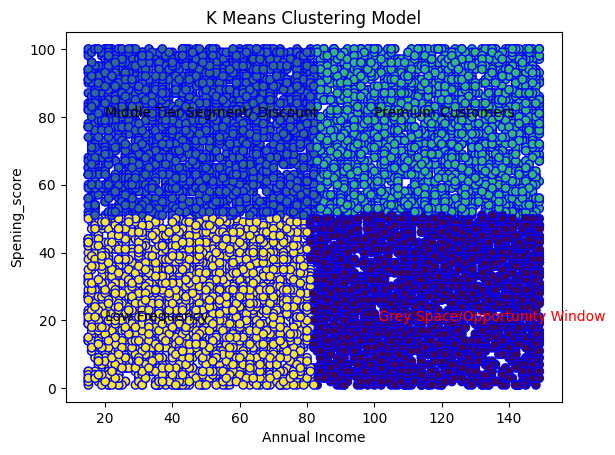

<BarContainer object of 4 artists>

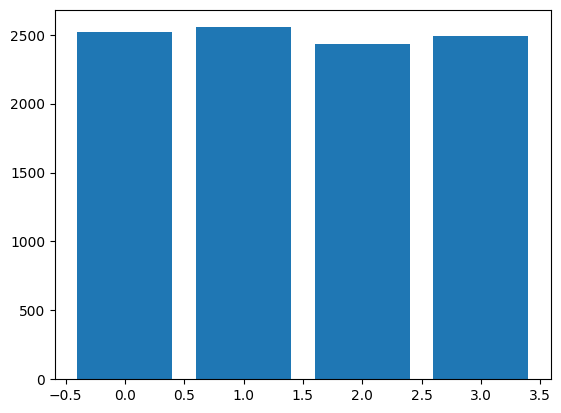

In [2]:
#Data importing

import pandas as pd 

Data = pd.read_csv(r"C:\Users\DELL\Downloads\customer_segmentation_10000.csv")
Data.head()
Data.info()

# Analysing the variables

import seaborn as sns

sns.scatterplot(data=Data,x='Annual_Income_k$',y='Spending_Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.axhline(50,linestyle = '--',color = 'red')
plt.axvline(80,linestyle = '--',color = 'red')
plt.title('Customers Buying Pattern')
plt.show()
Data

#First Clustering Model will be for customer buying patterns

#Transforming the data for reducing scaling errors or one sided results

from sklearn.preprocessing import StandardScaler

Alpha = StandardScaler()

Alpha_ = Alpha.fit_transform(Data[['Annual_Income_k$','Spending_Score']])

Alpha_

from sklearn.cluster import KMeans

# Elbow method for clustering model
import matplotlib.pyplot as plt

inertia = []

k_range = range(1,11)

for k in k_range:
        kmeans = KMeans(n_clusters=k,random_state=42)
        kmeans.fit(Alpha_)
        inertia.append(kmeans.inertia_)

plt.plot(k_range,inertia,marker = 'o')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.axvline(4,linestyle = '--',color = 'red')
plt.show()


# From Elbow method 4 is the optimal number of clusters

# Preparing the clustering model

Model = KMeans(n_clusters=4,random_state=42)

Model.fit(Alpha_)                                           #Fitting the dataset

Data['Cluster'] = Model.labels_                              # Adding the labels

Data

#Plotting our clustering model

plt.scatter(Data['Annual_Income_k$'],Data['Spending_Score'],
                c=Data['Cluster'],edgecolors='b',facecolors ='None'
             )
plt.xlabel('Annual Income')
plt.ylabel('Spening_score')
plt.text(100,80,"Premium Customers")
plt.text(100,20," Grey Space/Opportunity Window",color = 'red')
plt.text(20,80,"Middle Tier Segment/ Discount")
plt.text(20,20,"Low Frequency")
plt.title('K Means Clustering Model')
plt.show()

Final = Data['Cluster'].value_counts() 

plt.bar(Final.index,Data['Cluster'].value_counts())